# Create Simulation Figures

Run all cells to create figures from simulated data generated by:
- run_ensemble.py
- single_cell_metastasis.py
- synchronous_met.py

In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Ellipse, Circle
import seaborn as sns
import EpiClockInvasiveBRCA.src.util as epi_util
consts = epi_util.consts
import simulation as sim

In [5]:
figure_outdir = 'figures'
os.makedirs(figure_outdir, exist_ok=True)

In [6]:
# Configure graph
sf = consts['sf']
sns.set(rc={"savefig.bbox":'tight', 'axes.linewidth':sf}, font_scale=1, style='ticks')

## Example 3 sites

### Trajectories of beta values of sites

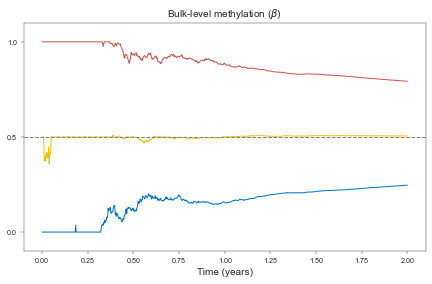

In [7]:
# Figure params
figsize = np.array([18, 10.5])
color_list = [consts['palette_jco'][i] for i in [0, 1, 3]]

# Import data
beta_arr = np.loadtxt(os.path.join('3_sites', 'beta_values.txt'), delimiter='\t', dtype=float)

# Process data
plot_data = pd.melt(pd.DataFrame(beta_arr).reset_index(), ['index'])
plot_data['Year'] = plot_data['index'] / 365
nyears = plot_data['Year'].max()

# Create figure

fig, ax = plt.subplots(figsize=figsize * sf)
plot = sns.lineplot(ax=ax, x='Year', y='value', data=plot_data,
                    hue='variable',
                    palette=color_list, linestyle='solid', linewidth=2.5 * sf)

# Customize figure
xlim = (-0.1, plot_data['Year'].max() + 0.1)
ax.set_ylim((-0.1, 1.1))
ax.set_yticks([0, 0.5, 1])
ax.set_title('Bulk-level methylation ($β$)', fontsize=consts['labelfontsize'] * sf)
ax.set_ylabel('')
ax.set_xlabel('Time (years)', fontsize=consts['labelfontsize'] * sf)
ax.legend('', frameon=False)

line_x = np.linspace(xlim[0], xlim[1], 100)
line_y = [0.5] * 100
ax.plot(line_x, line_y, color="grey", linestyle='dashed', linewidth=1)

# Add dashed line on 0.5
ax.tick_params(axis='both', labelsize=consts['ticksfontsize'] * sf, width=sf, length=8 * sf)

# Fix x-axis limits
ax.set_xlim(xlim)

# Save figure
fig.savefig(os.path.join(figure_outdir, 'simulation_3_sites.pdf'), format='pdf', pad_inches=0.1)

Fig1C_plot_data = plot_data

### Trajectory of number of cells

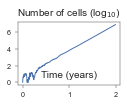

In [8]:
# Figure params
figsize = np.array([11, 7])
color_list = [consts['palette_jco'][i] for i in [0, 1, 3]]

# Import data
n_cells_list = np.loadtxt(os.path.join('3_sites', 'n_cells.txt'), dtype=int)

# Process data
plot_data = pd.DataFrame(data=np.log10(n_cells_list), columns=['log10_n_cells'])
plot_data['Year'] = plot_data.index / 365


# Create figure
fig, ax = plt.subplots(figsize=figsize * 5 / 12 * sf)
plot = sns.lineplot(ax=ax, x='Year', y='log10_n_cells', data=plot_data,
                    linestyle='solid', linewidth=2.5 * sf)

# Customize figure
xlim = (-0.1, nyears + 0.1)
ax.set_title('Number of cells (log$_{10}$)', fontsize=consts['labelfontsize'] * sf)
ax.set_ylabel('')
ax.set_xlabel('Time (years)', fontsize=consts['labelfontsize'] * sf)
ax.legend('', frameon=False)
ax.tick_params(axis='both', labelsize=consts['ticksfontsize'] * sf, width=sf, length=8 * sf)
ax.xaxis.set_label_coords(0.5, 0.23)

# Fix x-axis limits
ax.set_xlim(xlim)

# Save figure
fig.savefig(os.path.join(figure_outdir, 'simulation_3_sites_n_cells.pdf'), format='pdf', pad_inches=0.1)

Fig1C_subplot_plot_data = plot_data

### Save figure data

In [9]:
Fig1C_df = pd.DataFrame(beta_arr, columns = ('Fully un-methylated', 'Hemi-methylated', 'Fully methylated'))
Fig1C_df['Number of cells'] = n_cells_list
Fig1C_df.reset_index(names='Day', inplace=True)

epi_util.saveFigureData(Fig1C_df, 'Figure_1C')

## Ensemble of 90 sites

### Histograms at time checkpoints

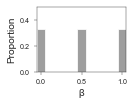

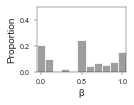

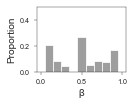

In [10]:
# Figure params
figsize = np.array([4, 3])
color_list = [consts['palette_jco'][i] for i in [0, 1, 3]]

# Import data
beta_values_arr = np.loadtxt(os.path.join('90_sites', 'beta_values.txt'), delimiter='\t', dtype=float).T

# Num CpGs in each group
n_CpGs_each = 30

# Configure time checkpoints
total_days = beta_values_arr.shape[1] - 1
time_checkpoints = [0, int(total_days/2), total_days]

# At each checkpoint, plot a histogram of beta values across the sites
k = 0    # Index just for figure filename
for chk in time_checkpoints:
    
    # Create plot
    fig, ax = plt.subplots(figsize=figsize * sf)
    sim.plotBetaValues(ax, beta_values=beta_values_arr[:, chk],
                   binwidth=0.1, color=consts['palette_jco'][2], opacity=consts['opacity'],
                   labelfontsize=consts['labelfontsize'], ticksfontsize=consts['ticksfontsize'], sf=sf, bins=np.linspace(-0.05, 1.05, 12))
    ax.set_ylim(0, 0.5)
    
    # DELETE
#     for j in range(3):
#         beta = np.mean(beta_values_arr[j*n_CpGs_each:(j+1)*n_CpGs_each, chk])     # Mean of sites in group
#         y_height = ax.get_ylim()[1]
#         ax.add_patch(Ellipse((beta, y_height/10), 0.25 * sf, 0.3*y_height * sf, color=color_list[j]))
    
    # Save figure
    fig.savefig(os.path.join(figure_outdir, f'simulation_300_sites_hist_{k}.pdf'), format='pdf', pad_inches=0.1)
    
    k += 1

### Trajectories of beta values of sites

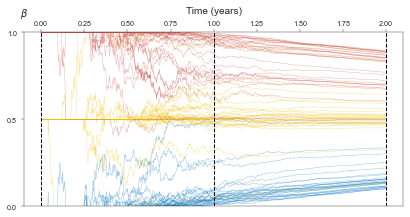

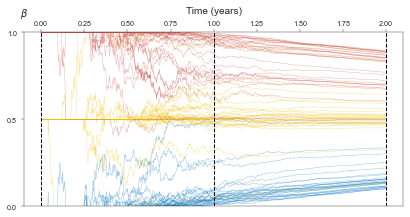

In [24]:
# Figure params
figsize = np.array([17, 8])
color_list = [consts['palette_jco'][i] for i in [0, 1, 3]]

# Process data
# Create a dataframe for each group of CpGs
# Set the "variable" column
data_list = []
for j in range(3):
    data = pd.melt(pd.DataFrame(
        beta_values_arr[j*n_CpGs_each:(j+1)*n_CpGs_each]
    ).T.reset_index(), ['index'])
    data['Year'] = data['index'] / 365
    data['variable'] += n_CpGs_each * j
    data_list.append(data)

# Concatenate dataframes
plot_data = pd.concat(data_list, axis=0)

# Extract number of years
nyears = plot_data['Year'].max()

# Set palette to match groups of CpGs
palette = np.concatenate([[color]*n_CpGs_each for color in color_list]).tolist()

# Create plot
fig, ax = plt.subplots(figsize=figsize * sf)
plot = sns.lineplot(ax=ax, x='Year', y='value', data=plot_data,
                    hue='variable', palette=palette,
                    linestyle='solid', linewidth=sf, alpha=0.5
                   )

# Move x-ticks and x-axis labels to be on top of he figure
ax.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False, labeltop=True)

# Customize figure
xlim = (-0.1, nyears + 0.1)
ax.set_ylim(0, 1)
ax.set_xlim(xlim)
ax.set_yticks([0, 0.5, 1])
ax.tick_params(axis='both', labelsize=consts['ticksfontsize'] * sf, width=sf, length=8 * sf)
ax.set_ylabel('$β$', rotation=0, fontsize=consts['labelfontsize'] * sf)
ax.yaxis.set_label_coords(0.0, 1.07)
ax.set_xlabel('Time (years)', fontsize=consts['labelfontsize'] * sf)
ax.xaxis.set_label_coords(0.5, 1.15)
ax.legend('', frameon=False)

# Add vertical lines at time checkpoints
for t in time_checkpoints:
    ax.axvline(x = t / 365, linestyle='dashed', color='black', linewidth=2.5 * sf)

# Save figure
fig.savefig(os.path.join(figure_outdir, 'simulation_300_sites.pdf'), format='pdf', pad_inches=0.1)

Fig3B_plot_data = plot_data

### Save figure data

In [43]:
def changeColumnNames(x):
    labels = ('Fully un-methylated', 'Hemi-methylated', 'Fully methylated')
    if x < 30:
        i = 0
    elif x < 60:
        i = 1
    else:
        i = 2
    return ' '.join([labels[i], str(x % 30)])
    
Fig3B_df = Fig3B_plot_data.pivot(index='index', columns='variable', values='value').rename(columns=changeColumnNames)
Fig3B_df.reset_index(names='Day', inplace=True)
epi_util.saveFigureData(Fig3B_df, 'Figure_3B')

/var/folders/m9/kv2y3r0s0p1_cl3s3py1wprh0000gn/T/ipykernel_13450/586401387.py:11: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  Fig3B_df = Fig3B_plot_data.pivot(index='index', columns='variable', values='value').rename(columns=changeColumnNames)


### Trajectory of $c_\beta$ and $s_\beta$

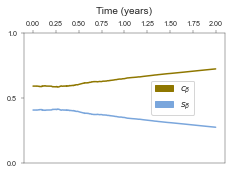

In [44]:
# Figure params
figsize = np.array([9, 6])

# Calculate s_beta and c_beta
s_beta = np.std(beta_values_arr, axis=0)
c_beta = 1 - s_beta

# Create figure
fig, ax = plt.subplots(figsize=figsize * sf)
year_arr = np.arange(0, nyears*365 + 1) / 365
ax.plot(year_arr, s_beta, color=consts['palette_jco'][4])
ax.plot(year_arr, c_beta, color=consts['palette_jco'][6])

# Move x-ticks and x-axis labels to be on top of he figure
ax.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False, labeltop=True)

# Customize figure
xlim = (-0.1, nyears + 0.1)
ax.set_ylim(0, 1)
ax.set_xlim(xlim)
ax.set_yticks([0, 0.5, 1])
ax.tick_params(axis='both', labelsize=consts['ticksfontsize'] * sf, width=sf, length=8 * sf)
ax.set_xlabel('Time (years)', fontsize=consts['labelfontsize'] * sf)
ax.xaxis.set_label_coords(0.5, 1.2)

# Create legend
patches = [
    mpatches.Patch(color=consts['palette_jco'][6], label='$c_β$'),
    mpatches.Patch(color=consts['palette_jco'][4], label='$s_β$')
]
leg = fig.legend(
    handles=patches,
    loc='upper right',
    bbox_to_anchor=(0.8, 0.63),
    fontsize=0.9*consts['labelfontsize'] * sf,
)

# Save figure
fig.savefig(os.path.join(figure_outdir, 'simulation_300_sites_c_s_beta.pdf'), format='pdf', pad_inches=0.1)

## Different death rates

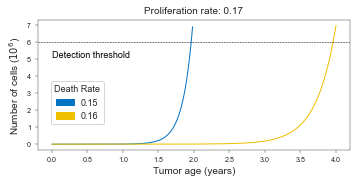

In [46]:
# Figure params
figsize = np.array([14,  6])
color_list = [consts['palette_jco'][i] for i in [0, 1]]

# Import data
n_cells_list = [
    np.loadtxt(os.path.join('3_sites', 'n_cells.txt'), dtype=int),
    np.loadtxt(os.path.join('larger_death_rate', 'n_cells.txt'), dtype=int)
]

# Simulation parameters that need to written on the plot
death_rate_list = [0.15, 0.16]
prolif_rate = 0.17

# Scale of y-axis
scale = 10**6

# Process data
# Create dataframe with time and # cells
plot_data = pd.concat([pd.DataFrame({'n_cells':n_cells_list[j], 'Death Rate':round(death_rate_list[j], 2)}) for j in range(2)], axis=0).reset_index()
plot_data = plot_data.loc[plot_data['n_cells'] <= plot_data.groupby('Death Rate')['n_cells'].max().min()]
plot_data['Year'] = plot_data['index'] / 365
plot_data['n_cells'] /= scale

# Color palette for plot
color_dict = dict(zip(plot_data['Death Rate'].unique(), color_list))

# Create plot
fig, ax = plt.subplots(figsize=figsize * sf)
plot = sns.lineplot(ax=ax, x='Year', y='n_cells', data=plot_data,
                    hue='Death Rate', legend=False,
                    palette=color_dict, linestyle='solid', linewidth=2.5 * sf)

# Customize figure
ax.set_title(f'Proliferation rate: {prolif_rate}', fontsize=consts['labelfontsize'] * sf)
ax.set_ylabel(f'Number of cells ($10^{int(np.log10(scale))}$)', fontsize=consts['labelfontsize'] * sf)
ax.set_xlabel('Tumor age (years)', fontsize=consts['labelfontsize'] * sf)
ax.tick_params(axis='both', labelsize=consts['ticksfontsize'] * sf, width=sf, length=8 * sf)

# Create legend
patches = [mpatches.Patch(color=color_dict[group], label=group) for group in color_dict.keys()]
leg = fig.legend(
    title = 'Death Rate',
    handles=patches,
    loc='upper right',
    bbox_to_anchor=(0.3, 0.55),
    fontsize=0.9*consts['labelfontsize'] * sf,
)
leg.get_title().set_fontsize(0.9*consts['labelfontsize'] * sf)

# Add horizontal dotted line and label it
ax.axhline(y=6, ls='--', lw=0.5, color='black')
ax.text(0, 5, 'Detection threshold',
        ha="left", va="bottom", fontfamily='sans-serif', color='black',
        fontsize=consts['labelfontsize'] * 0.9 * sf)

# Save figure
fig.savefig(os.path.join(figure_outdir, 'simulation_different_death_rates.pdf'), format='pdf', pad_inches=0.1)


Fig5A_plot_data = plot_data

### Save figure data

In [55]:
Fig5A_df = Fig5A_plot_data.pivot(index='index', columns='Death Rate', values='n_cells').rename(columns=lambda x:f'# cells (death rate: {x})')
Fig5A_df *= scale
Fig5A_df.reset_index(names='Day', inplace=True)

epi_util.saveFigureData(Fig5A_df, 'Figure_5A')

## Synchronous metastasis

### Import beta values data and calculate correlation data 

In [59]:
# Import data of three tumors
# For ensmbl_2, just reuse the 90_sites data
beta_values = {}
beta_values['ensmbl_1'] = np.loadtxt(os.path.join('synchro_met', 'beta_values_ensmbl_1.txt'), delimiter='\t', dtype=float)
beta_values['ensmbl_1_met'] = np.loadtxt(os.path.join('synchro_met', 'beta_values_ensmbl_1_met.txt'), delimiter='\t', dtype=float)
## DELETE
# beta_values['ensmbl_2'] = np.loadtxt(os.path.join('synchro_met', 'beta_values_ensmbl_2.txt'), delimiter='\t', dtype=float)
beta_values['ensmbl_2'] = np.loadtxt(os.path.join('90_sites', 'beta_values.txt'), delimiter='\t', dtype=float)

# Collect Pearson rvalues from correlation of beta values

rvalues_met_list = []        # Primary tumor vs. its metastass
rvalues_control_list = []    # Primary tumor vs. separate primary tumor
day_rg = range(beta_values['ensmbl_1'].shape[0])
for day in day_rg:
    beta_1 = beta_values['ensmbl_1'][day]
    beta_1_met = beta_values['ensmbl_1_met'][day]
    beta_2 = beta_values['ensmbl_2'][day]
    
    rvalues_met_list.append(sim.betaCorr(beta_1, beta_1_met))
    rvalues_control_list.append(sim.betaCorr(beta_1, beta_2))

### Create plot

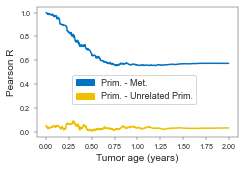

In [60]:
# Figure params
figsize = np.array([9, 6])
color_dict = dict(zip(['Prim. - Met.', 'Prim. - Unrelated Prim.'], consts['palette_jco']))

### DELETE
# sf = 1

# Create plot
fig, ax = plt.subplots(figsize=figsize * sf)
xvals = np.array(day_rg) / 365
ax.plot(xvals, rvalues_met_list, color=color_dict['Prim. - Met.'])
ax.plot(xvals, rvalues_control_list, color=color_dict['Prim. - Unrelated Prim.'])

# Customize figure
ax.set_ylabel(f'Pearson R', fontsize=consts['labelfontsize'] * sf)
ax.set_xlabel('Tumor age (years)', fontsize=consts['labelfontsize'] * sf)
ax.tick_params(axis='both', labelsize=consts['ticksfontsize'] * sf, width=sf, length=8 * sf)

# Create legend
patches = [mpatches.Patch(color=color_dict[group], label=group) for group in color_dict.keys()]
leg = fig.legend(
    handles=patches,
    loc='center',
    bbox_to_anchor=(0.5, 0.4),
    fontsize=0.9*consts['labelfontsize'] * sf,
)

# Save figure
fig.savefig(os.path.join(figure_outdir, 'synchro_met.pdf'), format='pdf', pad_inches=0.1)

## Late metastasis

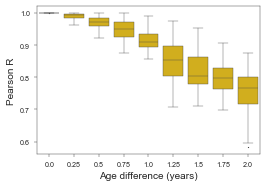

In [62]:
# Figure params
figsize = np.array([10, 6.8])

# Import data
indir = 'sc_met'
r_values_df = pd.read_table(os.path.join(indir, 'r_values.txt'), index_col=0)
r_values_df = r_values_df.T.rename(columns=lambda x:round(x/365, 2))

# Create plot
fig, ax = plt.subplots(figsize=figsize * sf)
sns.boxplot(ax=ax, data=r_values_df, color=consts['palette_jco'][1],
            linewidth=sf, fliersize=consts['fliersize'] * sf)

### DELETE
# skip_n = 4
# ax.set_xticks(ax.get_xticks()[::skip_n])
# ax.set_xticklabels([round(yr, 2) for yr in years_arr[::skip_n]])

# Customize figure
ax.set_xlabel('Age difference (years)', fontsize=consts['labelfontsize'] * sf)
ax.set_ylabel('Pearson R', fontsize=consts['labelfontsize'] * sf)
ax.tick_params(axis='both', labelsize=consts['ticksfontsize'] * sf, width=sf, length=8 * sf)

# Save figure
fig.savefig(os.path.join(figure_outdir, 'late_met.pdf'), format='pdf', pad_inches=0.1)

Fig7G_plot_data = r_values_df

### Save figure data

In [72]:
Fig7G_df = Fig7G_plot_data.melt().rename(columns={'variable':'Age difference (years)', 'value':'Pearson R'})

epi_util.saveFigureData(Fig7G_df, 'Figure_7G')